<h1 style="color:darkblue">Regresión Logísitca</h1>

### Introducción.
La regresión lógistica es muy parecida a los modelos de regresión lineales: predice el valor esperado $E(Y)$ de una variable dependiente $Y$ dado el valor de una o de distintas variables independientes $X_1, X_2, ... X_n$
El modelo logistico es para estimar la relación entre una variable dependiente cualitativa dicotómica, dadas una o varias variables independientes cualitativas o cuantitativas. 


### Función.
La regresión logíca calcula la probabilidad $P$ de que ocurra $Y$ a partir de las variables predictorias $X_n$
> <h2> $ P(Y) = \frac{1}{1+ e^{-{\beta_0 +\beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n}}} $ </h2>


### Supuestos
- Linealidad: Existe una relación binaria entre cada variable predictoria y el logaritmo de la variable respuesta.
- Independencia de los errores: Los residuos no siguen un patron claro, estan aleatoriamente distribuidos.
- Multicolinealidad: Las variables predictoras no deben estar altamente correlacionadas.

In [1]:
#librerias
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

## Ejemplo

Se desea medir el efecto de la enseñanza personalizada para los estudiantes, si Y = 1 significa que su calificación final fue A y si Y = 0 significa que fue diferente de A. 

In [2]:
#datos 
data = pd.read_excel("Datasets/gpa.xlsx",)

In [4]:
data.head()

,GPA,TUCE,PSI,calificación,letra
0,2.66,20,0,0,C
1,2.89,22,0,0,B
2,3.28,24,0,0,B
3,2.92,12,0,0,B
4,4.00,21,0,1,A


Notas:
 
 - Y=1 si la calificación final fue A
 - Y=0 si la calificación final fue B o C
 - TUCE  calificación en un examen presentado al comienzo del curso para evaluar los conocimientos previos de macroeconomía
 - PSI  1 con el nuevo método de enseñanza
 - 0 en otro caso
 - GPA  promedio de puntos de calificación inicial

Fuente: L. Spector y M. Mazzero, “Probit Analysis and Economic Education”, Journal of Economic Education, vol. 11, 1980, pp. 37-44.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
GPA             32 non-null float64
TUCE            32 non-null int64
PSI             32 non-null int64
calificación    32 non-null int64
letra           32 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


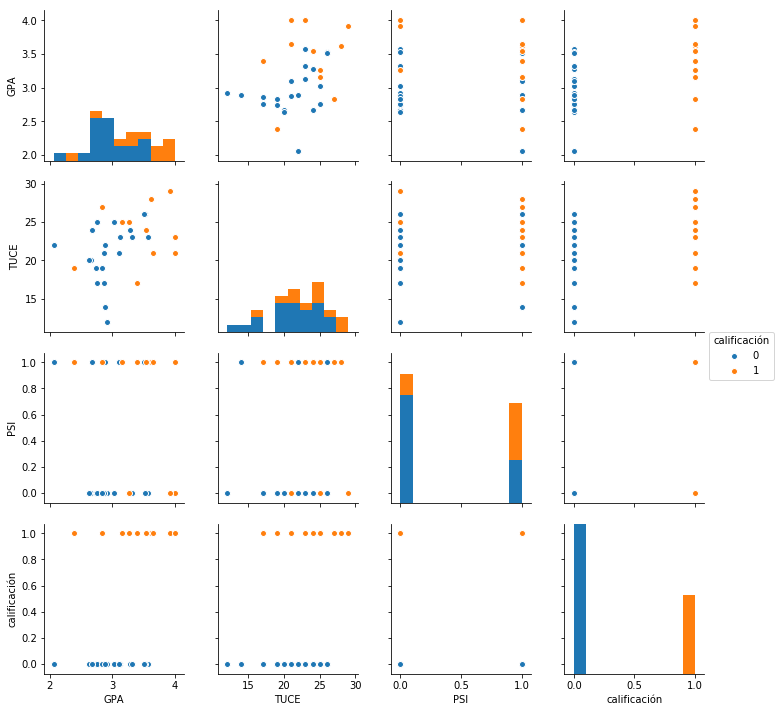

In [6]:
sns.pairplot(data, hue="calificación")

In [9]:
#variables del modelo logistico
Y = data["calificación"]
X = data[["GPA", "TUCE", "PSI"]]
X = sm.add_constant(X)

In [10]:
# modelo
model = sm.Logit(Y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           calificación   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                  0.3740
Time:                        21:24:12   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                  0.001502
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
GPA            2.8261      1.263      2.238      0.025       0.351       5.301
TUCE           0.0952      0.142      0.672      0.501      -0.182       0.373
PSI            2.3787      1.065      2.234      0.025       0.292       4.465
==============================================================================
"""

<b>Interpretación:</b>
>  La llamada "Pseudo $R^2$ es lo que se conoce como $R^2 \space McFadden$ que es:
> $R^2 = \frac{Predicciones}{Observaciones}$ En este caso como $R^2=0.374$ significa que este modelo se ajusta al 37.4% de los datos.
>
> Coeficientes: 
- Ya que el GPA = 2.826, significa que si los demás coeficientes permanecen constante, por cada aumento en 1 del GPA, aumenta en promedio el logit en 2.826.
- Se puede representar de forma analoga todos los demás coeficientes. Todos poseen una relación positiva con el logit.
- el p-valor asociado a casi todos los coeficientes es menor al 5%, lo cual indica que son significativos a nivel estadístico. La única excepción es el coeficiente de TUCE, cuyo p-valor es de 0.501 = 50.1% por lo que podría omitirse este coeficiente.
>
> Todas las variables regresoras tienen un impacto en la calificación, dado que el p-valor asociado al modelo en su conjunto es de LLR p = 0.001502 por lo que es muy significativo a nivel estadístico.
>
> nota: la hipotesis nula $H_0$ asociada al p-valor de los coeficientes, mide la probabilidad e que que un coeficiente sea igual a cero.

In [13]:
#modelo sin variable TUCE
Y = data["calificación"]
X = data[["GPA", "PSI"]]
X = sm.add_constant(X)

model2 = sm.Logit(Y, X).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.410205
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           calificación   No. Observations:                   32
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            2
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                  0.3625
Time:                        21:24:20   Log-Likelihood:                -13.127
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                 0.0005727
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6016      4.213     -2.754      0.006     -19.859      -3.344
GPA            3.0634      1.223      2.505      0.012       0.667       5.460
PSI            2.3378      1.041      2.246      0.025       0.298       4.378
==============================================================================
"""

> Ahora el modelo en su conjunto es más significativo $R^2 = 0.3625$ y $LLR_{p-value} = 0.0005$, asi como también son más significativos los coeficientes de forma individual. 

###### Multicolinealidad
Para verificar este supuesto se utilizará el VIF (Variance Inflation Factor)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif = pd.DataFrame()
#X.shape[1] = 3, ya que existen 3 variables
# la funcion "variance_inflation_factor" toma como parametros los datos y el numero de variables

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Variables"] = X.columns

In [16]:
vif

,VIF Factor,Variables
0,47.424321,const
1,1.001577,GPA
2,1.001577,PSI


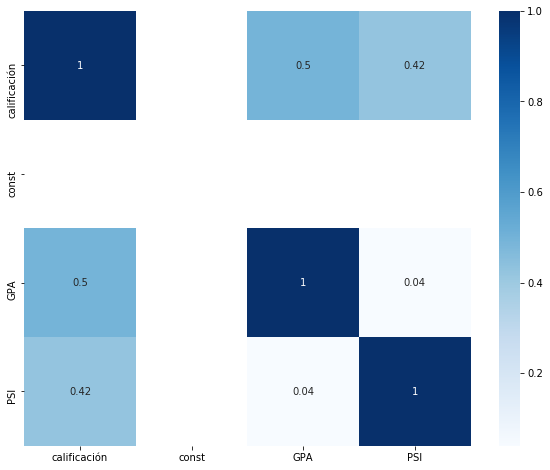

In [17]:
Z = pd.concat([Y, X], axis=1)

plt.figure(figsize=(10,8))
sns.heatmap(Z.corr(), cmap="Blues", annot=True)
plt.show()

> Aunque el VIF de la constante es superior a 10 (que es cuando un VIF indica multicolinealidad) es una variable artificial que no guarda correlación con las otras variables explicatorias, por lo que no hay evidencia de multicolinealidad.

###### Independencia de los errores

Para evualuar la independencia de los errores, se utilizará el estadístico Durbin-Watson. Este toma valores entre 0 y 4, donde 2 inidica que no existe relacion entre los errores.

In [18]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model2.resid_generalized)
print(round(dw,4))

2.2609


> Como el Durbin-Watson resulto cercano a 2, se acepta que los errores no esta relacionados.

###### Modelo con Sklearn

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [22]:
data.corr()

,GPA,TUCE,PSI,calificación
GPA,1.000000,0.386986,0.039683,0.497147
TUCE,0.386986,1.000000,0.112780,0.303055
PSI,0.039683,0.112780,1.000000,0.422760
calificación,0.497147,0.303055,0.422760,1.000000


In [27]:
#Variables
Y = data["calificación"]
X = data[["GPA", "TUCE","PSI"]]
X = sm.add_constant(X)

#Selección de variables
lr = LogisticRegression()

n=1

rfe = RFE(lr, n)
rfe = rfe.fit(X,Y)

In [28]:
rfe.support_

array([False, False, False,  True])

In [29]:
rfe.ranking_

array([2, 3, 4, 1])

In [30]:
z = zip(X.columns, rfe.support_, rfe.ranking_)
z = list(z)
z

[('const', False, 2), ('GPA', False, 3), ('TUCE', False, 4), ('PSI', True, 1)]

Las variables más importantes para predecir la calificación son: PSI, GPA y la constante. 

In [32]:
X = data[["GPA","PSI"]]
X = sm.add_constant(X)

In [33]:
sk_logit = LogisticRegression().fit(X, Y)

#R cuadrada
sk_logit.score(X,Y)

0.8125

In [34]:
#Coeficientes:
coeficientes = list( zip( X.columns, np.transpose(sk_logit.coef_) ) )
coeficientes = pd.DataFrame(coeficientes, columns=["Variables", "Coef"])
coeficientes

,Variables,Coef
0,const,[-0.8873227060465951]
1,GPA,[0.2520660384223032]
2,PSI,[0.9872760191869184]


In [35]:
#imprimir el resumen del modelo con statsmodels para comparación
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           calificación   No. Observations:                   32
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            2
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                  0.3625
Time:                        21:37:13   Log-Likelihood:                -13.127
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                 0.0005727
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6016      4.213     -2.754      0.006     -19.859      -3.344
GPA            3.0634      1.223      2.505      0.012       0.667       5.460
PSI            2.3378      1.041      2.246      0.025       0.298       4.378
==============================================================================
"""

###### Conclusiones:
El model de regresión logística es uno de los más comunes y utilizados. Es importante siempre profundizar en las matemáticas detras del modelo, como los supuestos, el método de newton-raphson que se utiliza en el modelo logit y la máxima verosimilitud.

En el ejemplo realizado, solamente se pudo calcular el 36% de las calificaciones dado que la relación entre las variables era muy leve.

### Fuentes:
- Ferre Jaén M. E. (2019) FEIR 45: Regresión logística. Apuntes del curso FEIR3, curso 2014/15 actualizados. Extraído el 30 de junio de 2020 de: http://gauss.inf.um.es/feir/45/
- Gujarati & Porter (2010) El modelo logit (cap. 15 Modelos de regresión de respuesta cualitativa) . Econometría (5ta Edición). McGraw-Hill Education. Ciduad de México.
- Tavares E. (2017) Variance Inflation Factor (VIF) Explained. Extraído el 30 de junio de 2020 de: https://etav.github.io/python/vif_factor_python.html